In [2]:
function calc_HtbModel3D(Nx,Ny,Nz,μ)
    N = Nx*Ny*Nz
    mat_Htb = zeros(Float64,N,N)    
    t = 1.0
    for ix =1:Nx
        for iy=1:Ny
            for iz=1:Nz
                for dx = -1:1
                    for dy = -1:1
                        for dz = -1:1

                            jx = ix + dx
                            jx += ifelse(jx > Nx,-Nx,0)
                            jx += ifelse(jx < 1,Nx,0)

                            jy = iy + dy
                            jy += ifelse(jy > Ny,-Ny,0)
                            jy += ifelse(jy < 1,Ny,0)

                            jz = iz + dz
                            jz += ifelse(jz > Nz,-Nz,0)
                            jz += ifelse(jz < 1,Nz,0)

                            iii= (iz-1)*Nx*Ny+(iy-1)*Nx+ix
                            jjj = (jz-1)*Nx*Ny+(jy-1)*Nx+jx

                            if dx == 0 && dy == 0 && dz == 0
                                mat_Htb[iii,jjj] = -μ
                            elseif abs(dx)== 1 && dy == 0 && dz == 0
                                mat_Htb[iii,jjj] = -t
                            elseif abs(dy)== 1 && dx == 0 && dz == 0
                                mat_Htb[iii,jjj] = -t
                            elseif abs(dz)== 1 && dx == 0 && dy == 0
                                mat_Htb[iii,jjj] = -t
                            end
                        end 
                    end
                end
            end
        end
    end    
    return mat_Htb
end

calc_HtbModel3D (generic function with 1 method)

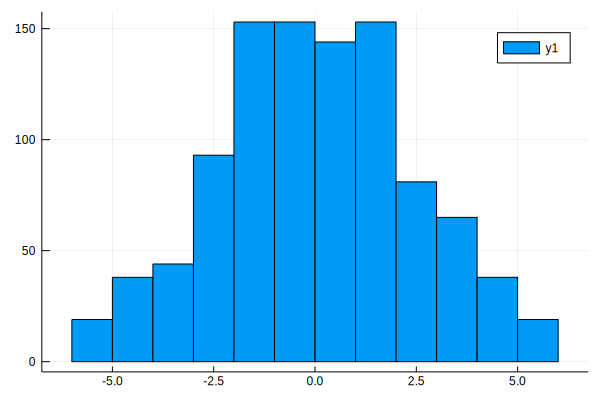

In [9]:
Nx = 10
Ny = 10
Nz = 10
μ = 0.0
mat_H = calc_HtbModel3D(Nx,Ny,Nz,μ)
using LinearAlgebra
energy,mat_v = eigen(mat_H)
using Plots
histogram(energy,bins=20)